In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cufflinks


  Preparing metadata (setup.py) ... done
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67895 sha256=776e39744098f6589cfb2399a5780e00ccc7b86cdeeb2b27411af380da4e6abd
  Stored in directory: /Users/rachita/Library/Caches/pip/wheels/c0/d9/70/372130dacf508192607c1a7359c7bf0656b1a3b79f6cf66f7a
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

In [3]:
import cufflinks as cf

In [5]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

In [7]:
##to use javascript
init_notebook_mode(connected = True)

In [9]:
cf.go_offline()

In [13]:
df = pd.DataFrame(np.random.randn(100,4), columns = "A B C D".split( " "))
df.head()

,A,B,C,D
0,-1.681988,0.554446,1.294301,1.635213
1,0.231887,-1.692864,0.317998,1.204098
2,-0.958608,0.172973,0.083436,1.227446
3,-0.275307,-0.581671,0.130570,0.521547
4,0.139541,-1.555340,0.815873,-1.197476


<Axes: >

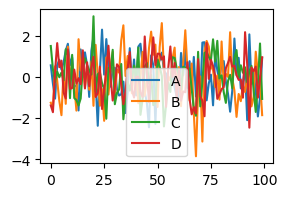

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


df.plot(figsize = (3,2)) 

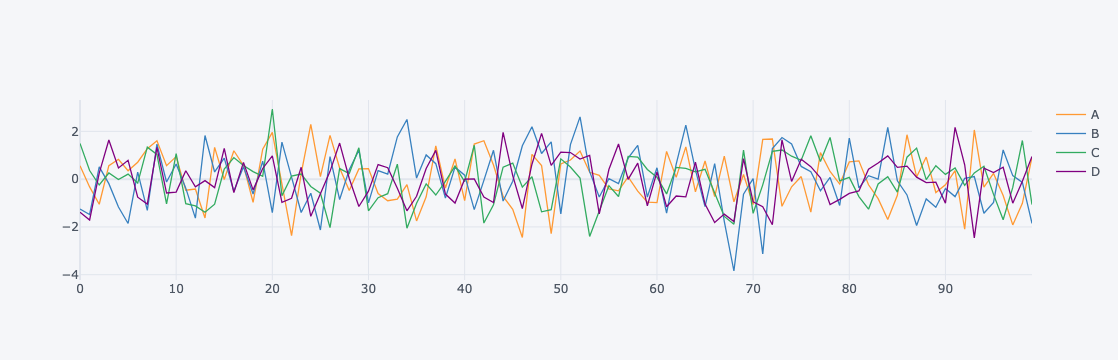

In [38]:
df.iplot()

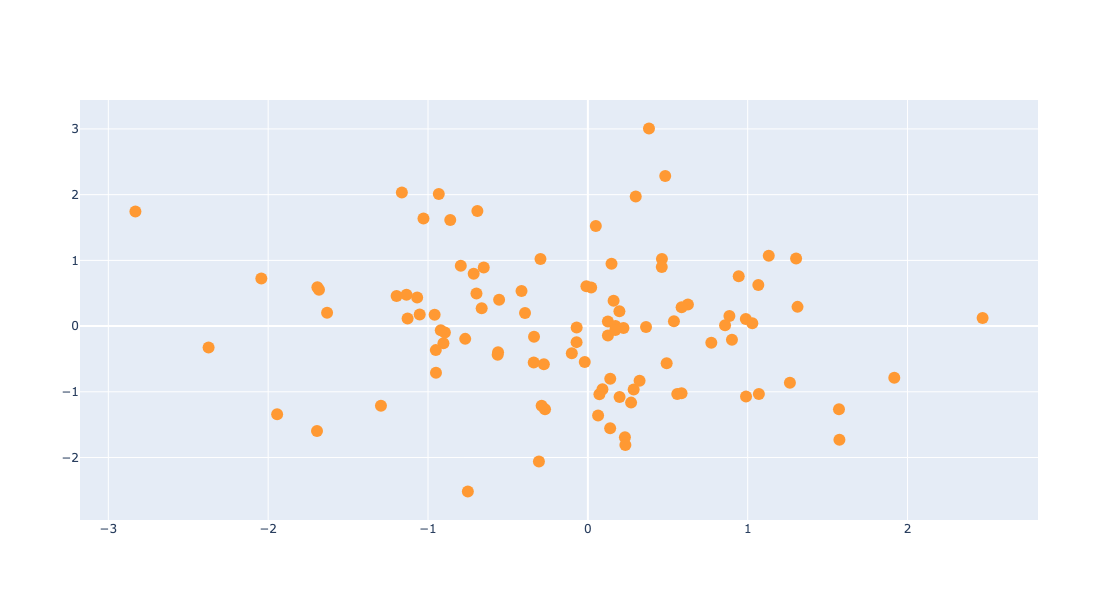

In [31]:
#scatterplot
df.iplot(kind = 'scatter', x = 'A', y = 'B', mode = 'markers',layout=dict(width= 700, height=600) )

In [55]:
df2 = pd.DataFrame({'Cat': ['A','B','A','B','A','B','B','B','A'], 'value':np.random.rand(9)*10})

In [57]:
df2.head()

,Cat,value
0,A,0.994140
1,B,6.763267
2,A,9.268898
3,B,5.775407
4,A,6.535711


In [53]:
np.random.rand(9)*10

array([5.27606003, 6.75775721, 3.36010929, 7.30695629, 0.60191214,
       6.36938592, 5.81862983, 3.84409633, 6.80759204])

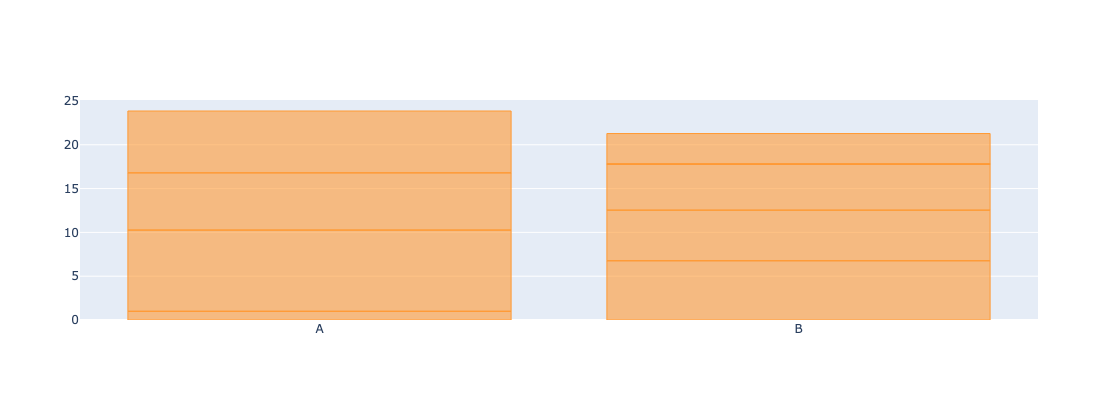

In [63]:
df2.iplot(kind = 'bar', x = 'Cat', y = 'value',layout=dict(width= 700, height=400) )

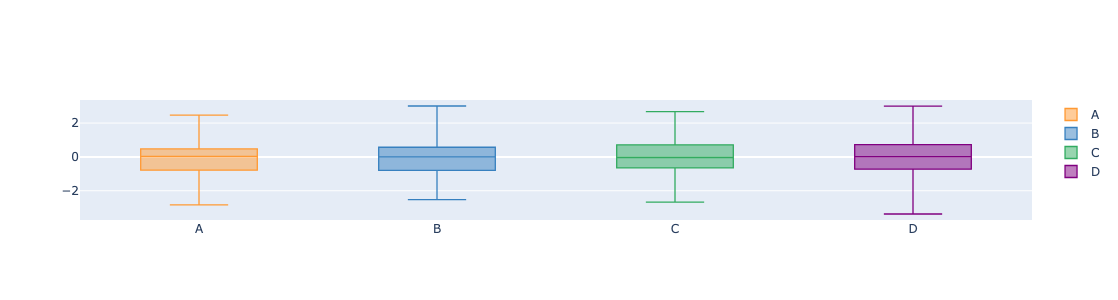

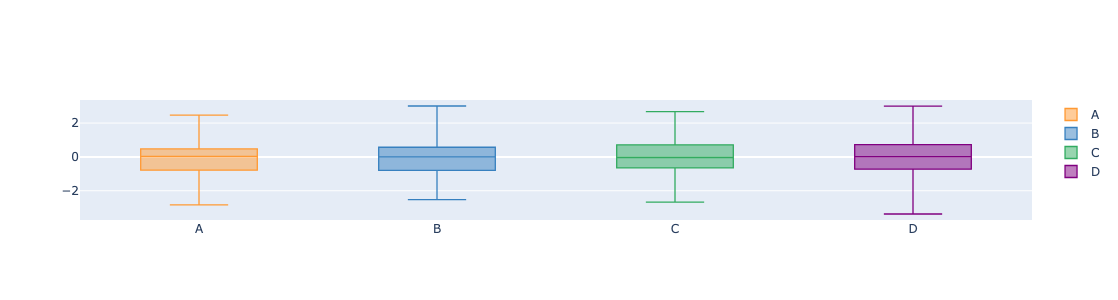

In [77]:
# box plot
df.iplot(kind = 'box',layout=dict(width= 700, height=300) )

# box plot
df.iplot(kind = 'box',layout=dict(width= 400, height=300) )

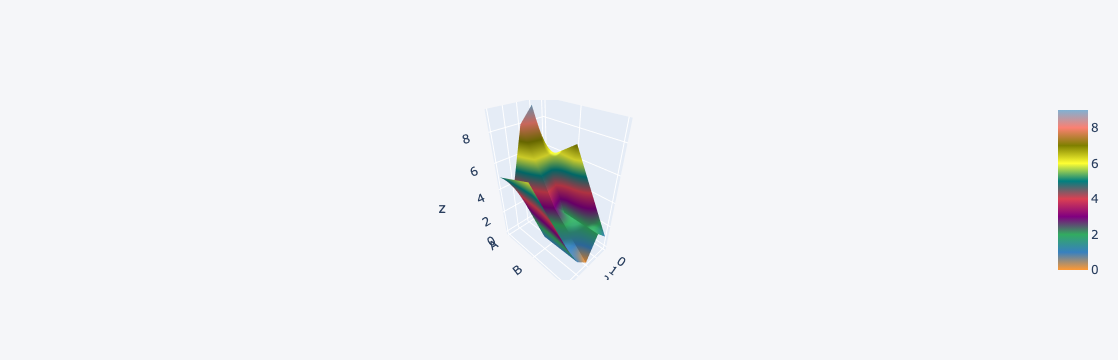

In [93]:
df4 = pd.DataFrame({'A':[5,9,8,4,5],'B':[7,2,3,1,6],'C':[1,2,0,1,3]})
df4.iplot('surface')

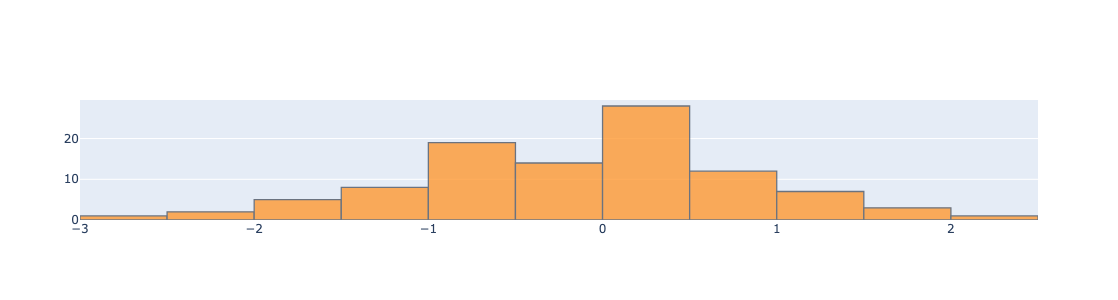

In [109]:
df['A'].iplot(kind = 'hist',layout=dict(width= 400, height=300) )

In [119]:
pd.np = np

In [121]:
np.random.seed(0)
df5 = pd.DataFrame({
    'A': np.random.randn(100).cumsum(),  # Cumulative sum for trend
    'B': np.random.randn(100).cumsum()
})

/opt/anaconda3/lib/python3.12/site-packages/cufflinks/plotlytools.py:848: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



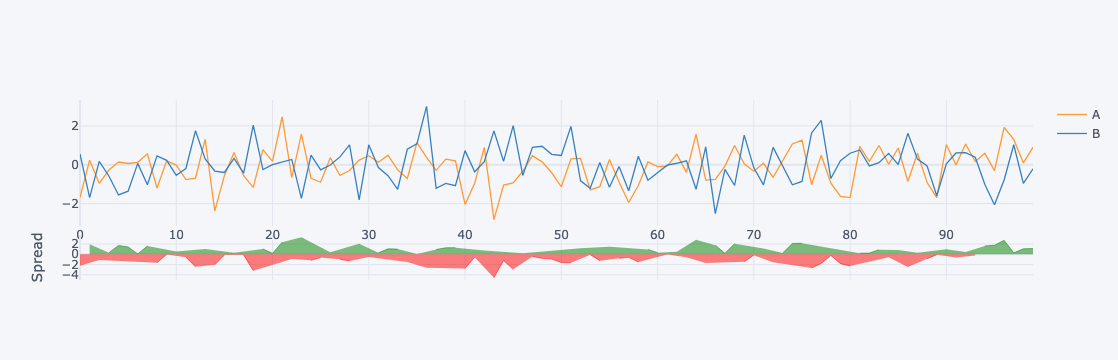

In [131]:
df[['A', 'B']].iplot(
    kind='spread' #,
    # layout=dict(
    #     width=600,
    #     height=400,
    #     yaxis=dict(title='Spread between A and B')
    # )
)


In [153]:
#scatterplot

df['A1'] = df['A'].apply(lambda x: abs(x)*10)
df['B1'] = df['B'].apply(lambda x: abs(x)*10)
df['C1'] = df['C'].apply(lambda x: abs(x)*10)
df.head()

,A,B,C,D,A1,B1,C1
0,-1.681988,0.554446,1.294301,1.635213,16.819881,5.544458,12.943010
1,0.231887,-1.692864,0.317998,1.204098,2.318875,16.928640,3.179981
2,-0.958608,0.172973,0.083436,1.227446,9.586082,1.729727,0.834364
3,-0.275307,-0.581671,0.130570,0.521547,2.753068,5.816707,1.305704
4,0.139541,-1.555340,0.815873,-1.197476,1.395415,15.553400,8.158733


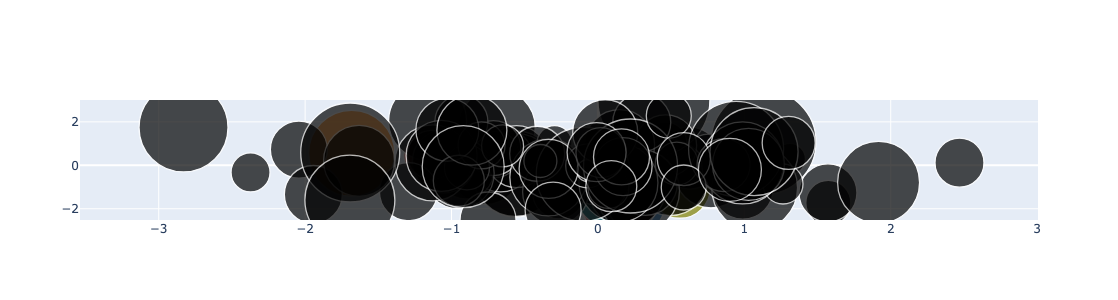

In [161]:
df.iplot(kind = "bubble", x = 'A', y = 'B', size = 'C')

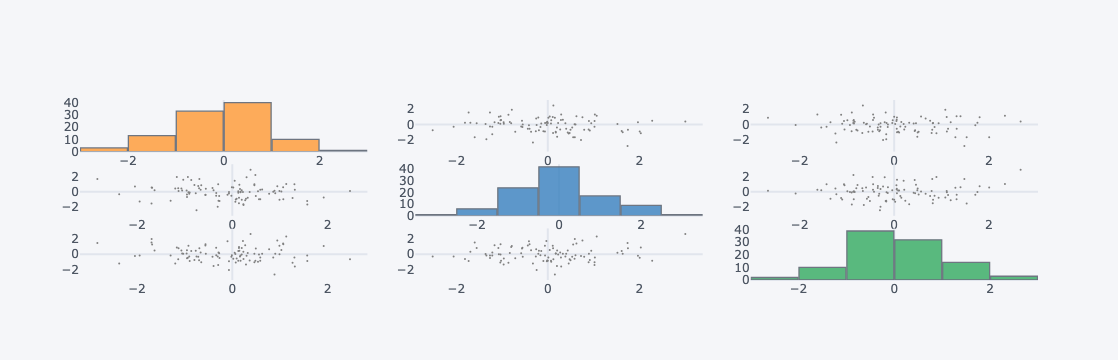

In [165]:
df[['A','B','C']].scatter_matrix()

## Geographical

In [180]:
import plotly.graph_objs as go 

df_ge = pd.read_csv('2014_World_GDP')

In [206]:
df_ge.head()

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND


In [208]:
df_ge

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
...,...,...,...
217,Virgin Islands,5.08,VGB
218,West Bank,6.64,WBG
219,Yemen,45.45,YEM
220,Zambia,25.61,ZMB


In [188]:
data = dict(
        type = 'choropleth',
        locations = df_ge['CODE'],
        z = df_ge['GDP (BILLIONS)'],
        text = df_ge['COUNTRY'],
        colorbar = {'title' : 'GDP Billions US'},
      ) 

In [202]:
layout = dict(
    title = '2014 Global GDP',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='stereographic'
    )
)

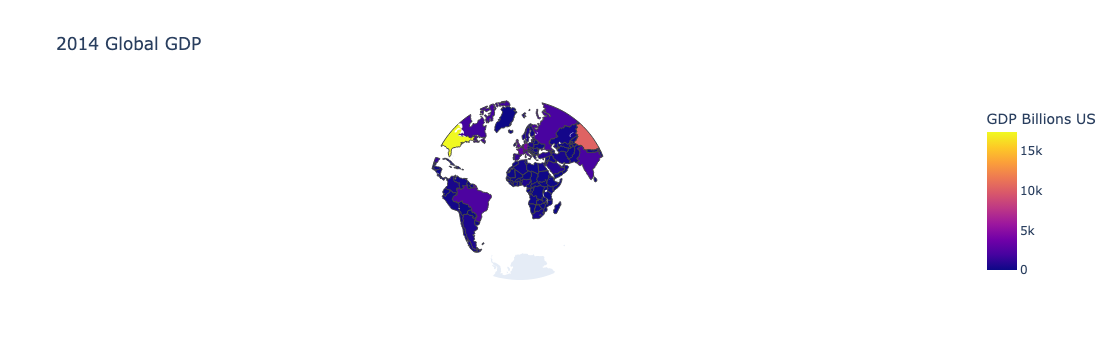

In [204]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)